# Las Vegas Legion vs Los Angeles Guerillas

#### Since LVL are playing LAG today and both played yesterday, I have decided to complete some analysis to identify who should win in which aspects of the match up.

To begin with, the data will be scraped and saved for both temas previous matches using the match ID's obtained from the CDL website

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, "Machine Learning Practice\CDL-Stats\data_scraping")

%matplotlib inline

Now that I have linked the path to the scraper (Not Ideal :D Method) I can scrape the required data

In [72]:
from data_scraping.cdl_scraper import parse_cdl_website as scraper

lag_last_game = scraper(8740)
lvl_last_game = scraper(8739)

Now that the data has been scraped, it can be read in from the save, rather than scraped each time it is needed


In [73]:
lag_df = pd.read_csv('data/cdl_8740.csv')
lvl_df = pd.read_csv('data/cdl_8739.csv')

mapset = [(a, b) for a, b in zip(lag_df['gameMap'], lag_df['gameMode'])]
mapset = (list(dict.fromkeys(mapset)))
print(f"The map set for LAG's last game was {mapset}")

The map set for LAG's last game was [('Zarqwa Hydroelectric', 'CDL Hardpoint'), ('Mercado Las Almas', 'CDL SnD'), ('Breenbergh Hotel', 'CDL Control'), ('Al Bagra Fortress', 'CDL Hardpoint'), ('Embassy', 'CDL SnD')]


To confirm that this is the right data, I have inspected the mapset and confirmed that it aligns with the correct CDL match

In [74]:
lag_df.columns.values

array(['gameMap', 'gameMode', 'id', 'programId', 'firstName', 'lastName',
       'alias', 'headshot', 'socialNetworkHandles', 'averageSpeed',
       'highestStreak', 'untradedKills', 'untradedDeaths', 'tradedKills',
       'tradedDeaths', 'inapplicableTradedKills',
       'inapplicableTradedDeaths', 'damageTaken', 'damageHealed',
       'tacticalsUsed', 'lethalsUsed', 'percentTimeMoving',
       'deadSilenceTime', 'hillTime', 'contestedHillTime', 'totalKills',
       'totalDeaths', 'totalAssists', 'totalScore', 'totalShotsFired',
       'totalShotsHit', 'totalShotsHead', 'totalDamageDealt',
       'friendDamage', 'totalTimeAlive', 'totalDistanceTraveled',
       'highestMultikill', 'totalAces', 'totalInVictimFovKills',
       'totalDefuserKills', 'totalFirstBloodKills', 'totalLongshotKills',
       'totalPlanterKills', 'totalPointblankKills', 'totalRevengeKills',
       'totalRotationKills', 'totalInAttackerFovKills',
       'totalWallbangKills', 'killDeathRatio', 'calculatedHillTime',

In [149]:
def assign_extra_vars(df):
    df['map_winner'] = ["host" if a > b else "guest" for a, b in zip(df['matchGameResult.hostGameScore'], df['matchGameResult.guestGameScore'])]

    df['is_winner'] = ["Y" if a == b else "N" for a, b in zip(df['map_winner'], df['team_type'])]

    df['accuracy'] = [(a/+b)*100 for a, b in zip(df['totalShotsHit'], df['totalShotsFired'])]

    df['kills_untraded_perc'] = [(a/b)*100 for a, b in zip(df['untradedKills'], df['totalKills'])]

    df['deaths_traded_perc'] = [(a/b)*100  if b > 0 else 0 for a, b in zip(df['tradedDeaths'], df['totalDeaths'])]

    return df

lag_refined = lag_df[['alias', 'gameMode', 'gameMap', 'totalDistanceTraveled', 'totalDamageDealt', 'totalShotsFired', 'totalShotsHit', 
        'totalAssists', 'totalDeaths', 'totalKills', 'hillTime', 'percentTimeMoving', 'lethalsUsed', 'tacticalsUsed',
        'tradedDeaths', 'tradedKills', 'untradedDeaths', 'untradedKills', 'team_type', 'totalRotationKills', 
        'matchGameResult.hostGameScore', 'matchGameResult.guestGameScore'
        ]]

lvl_refined = lvl_df[['alias', 'gameMode', 'gameMap', 'totalDistanceTraveled', 'totalDamageDealt', 'totalShotsFired', 'totalShotsHit', 
        'totalAssists', 'totalDeaths', 'totalKills', 'hillTime', 'percentTimeMoving', 'lethalsUsed', 'tacticalsUsed',
        'tradedDeaths', 'tradedKills', 'untradedDeaths', 'untradedKills', 'team_type', 'totalRotationKills', 
        'matchGameResult.hostGameScore', 'matchGameResult.guestGameScore'
        ]]

lag_refined = assign_extra_vars(lag_refined)
lvl_refined = assign_extra_vars(lvl_refined)


C:\Users\charl\AppData\Local\Temp\ipykernel_20192\667721874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['map_winner'] = ["host" if a > b else "guest" for a, b in zip(df['matchGameResult.hostGameScore'], df['matchGameResult.guestGameScore'])]
C:\Users\charl\AppData\Local\Temp\ipykernel_20192\667721874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_winner'] = ["Y" if a == b else "N" for a, b in zip(df['map_winner'], df['team_type'])]
C:\Users\charl\AppData\Local\Temp\ipykernel_20192\667

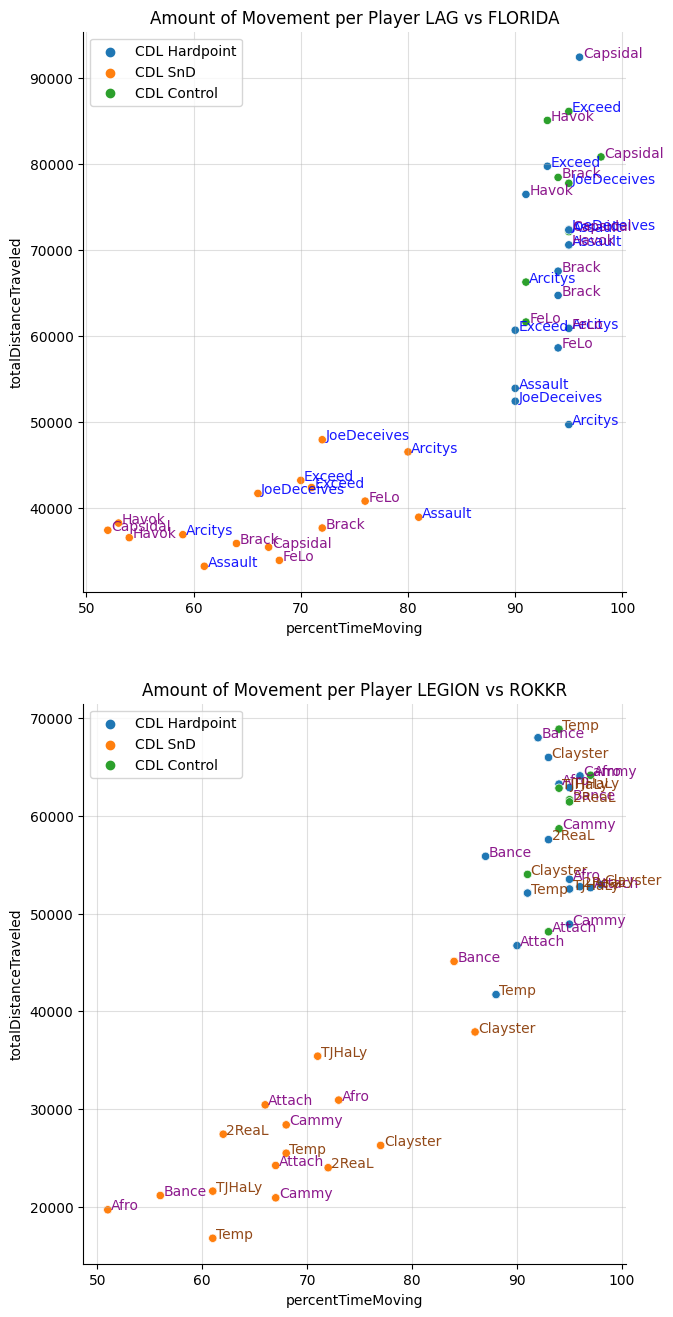

In [150]:
# Plot to understand pace

fig = plt.figure(figsize=(7, 16))
ax1, ax2 = fig.subplots(nrows=2)
ax1.set_title("Amount of Movement per Player LAG vs FLORIDA")
ax2.set_title("Amount of Movement per Player LEGION vs ROKKR")

sns.scatterplot(data=lag_refined, x='percentTimeMoving', y='totalDistanceTraveled', hue='gameMode', ax=ax1)
for x, y, s, t in zip(lag_refined['percentTimeMoving'], lag_refined['totalDistanceTraveled'], lag_refined['alias'], lag_refined['team_type']):
    ax1.text(x+0.3, y, s, alpha=0.9, color=("purple" if t == 'host' else "blue"))

    sns.scatterplot(data=lvl_refined, x='percentTimeMoving', y='totalDistanceTraveled', hue='gameMode', ax=ax2)
for x, y, s, t in zip(lvl_refined['percentTimeMoving'], lvl_refined['totalDistanceTraveled'], lvl_refined['alias'], lag_refined['team_type']):
    ax2.text(x+0.3, y, s, alpha=0.9, color=("purple" if t == 'host' else "#873600"))

handles, labels = ax2.get_legend_handles_labels()
ax1.legend(handles[0:3], labels[0:3])
ax2.legend(handles[0:3], labels[0:3])
ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax1.grid(True, alpha=0.4)
ax2.grid(True, alpha=0.4)

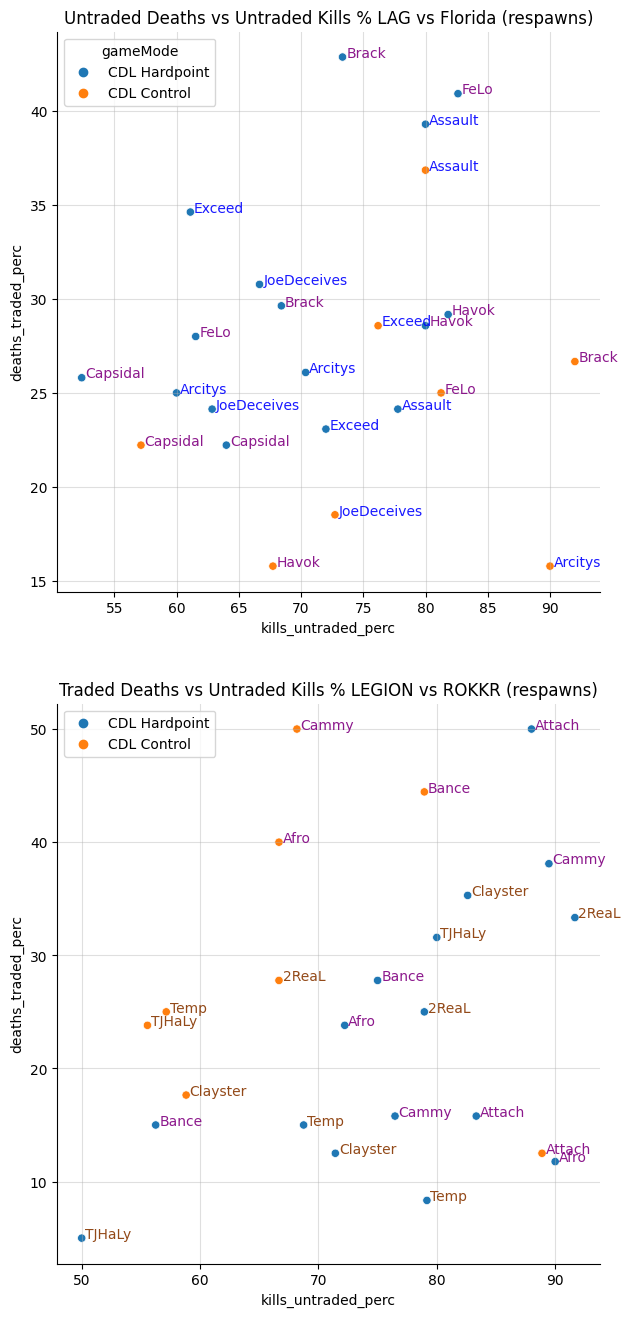

In [153]:

lag_resp = lag_refined[lag_refined['gameMode'] != 'CDL SnD']
lvl_resp = lvl_refined[lvl_refined['gameMode'] != 'CDL SnD']

fig = plt.figure(figsize=(7, 16))
ax1, ax2 = fig.subplots(nrows=2)

ax1.set_title("Untraded Deaths vs Untraded Kills % LAG vs Florida (respawns)")
sns.scatterplot(data=lag_resp, x='kills_untraded_perc', y='deaths_traded_perc', hue='gameMode', ax=ax1)
for x, y, s, t in zip(lag_resp['kills_untraded_perc'], lag_resp['deaths_traded_perc'], lag_resp['alias'], lag_resp['team_type']):
    ax1.text(x+0.3, y, s, alpha=0.9, color=("purple" if t == 'host' else "blue"))

ax2.set_title("Traded Deaths vs Untraded Kills % LEGION vs ROKKR (respawns)")
sns.scatterplot(data=lvl_resp, x='kills_untraded_perc', y='deaths_traded_perc', hue='gameMode', ax=ax2)
for x, y, s, t in zip(lvl_resp['kills_untraded_perc'], lvl_resp['deaths_traded_perc'], lvl_resp['alias'], lvl_resp['team_type']):
    ax2.text(x+0.3, y, s, alpha=0.9, color=("purple" if t == 'host' else "#873600"))

ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax1.grid(True, alpha=0.4)
ax2.grid(True, alpha=0.4)
ax2.legend(loc='upper left');